In [9]:
#libraries

import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Numerical Projects and Exercises

3.1 **Simulating Brownian motion using increments** Use the definition of Brownian motion in Proposition 3.1 to construct a function def in Python that takes as inputs the time interval and the step size and yields as an output a Brownian path.

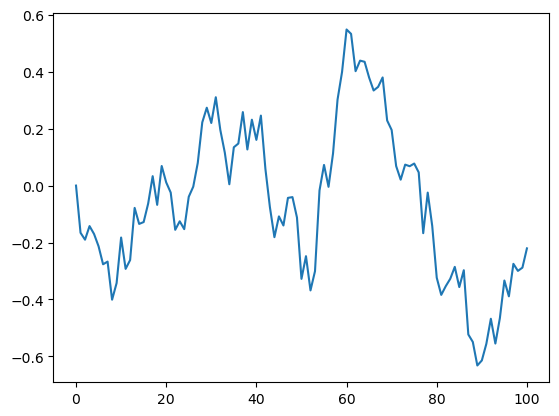

In [2]:
def brownian_motion(time_interval, step_size):
    no_of_steps = int(time_interval/step_size)
    B = [0]
    for i in range(no_of_steps):
        B.append(B[-1] + np.sqrt(step_size) * np.random.standard_normal())
    return B

# Plotting one BM realization

B1 = brownian_motion(1, 0.01)

plt.plot(B1)

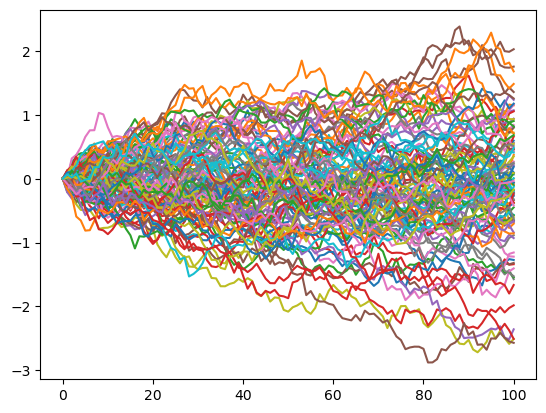

In [3]:
# Plotting a 100 BM realizations

B = []
for i in range(100):
    B.append(brownian_motion(1, 0.01))
    
for i in range(100):
    plt.plot(B[i])

3.2 **Simulating the Poisson process** Use Definition 3.19 to generate 10 paths of the Poisson process with rate 1 on the interval [0,10] with step size 0.01.

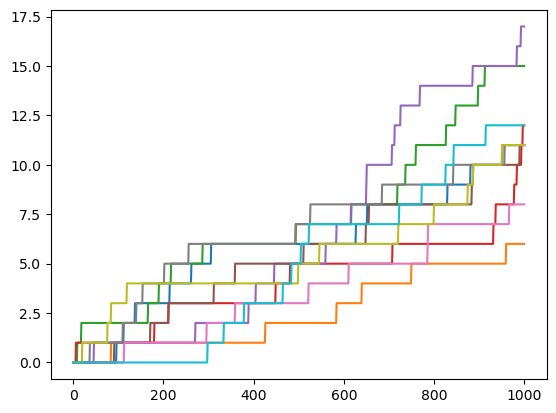

In [4]:
def poisson(time_interval, step_size):
    no_of_steps = int(time_interval/step_size)
    rate = 1
    P = [0]
    for i in range(no_of_steps):
        P.append(P[-1] + np.random.poisson(rate*step_size))
    return P

X = []

for i in range(10):
    X.append(poisson(10, 0.01))
    
for i in range(10):
    plt.plot(X[i])

3.3 **The arcsine law** Consider a Brownian motion on [0,1], ($𝐵_𝑡$, 𝑡 ∈ [0, 1]). What is the proportion of time of [0,1] for which a Brownian path is positive? Call this random variable 𝑋. It turns out that the CDF of 𝑋 is

$P(X\le x) = \frac{2}{\pi} arcsin(\sqrt{x}) \int\limits_0^x \frac{1}{\sqrt{y(1-y)}}dy,  x \le 1 $

This will be motivated further in Example 8.29. For now, verify this law numerically by sampling 1,000 Brownian paths with time step 0.01 and plotting the histogram of the sample. You should get a histogram resembling Figure 3.2. Can you interpret the two
peaks at 0 and 1?

C:\Users\sindh\AppData\Local\Temp\ipykernel_5112\2024551752.py:12: RuntimeWarning: divide by zero encountered in divide
  y = 1 / (np.sqrt(x * (1-x)) * np.pi)


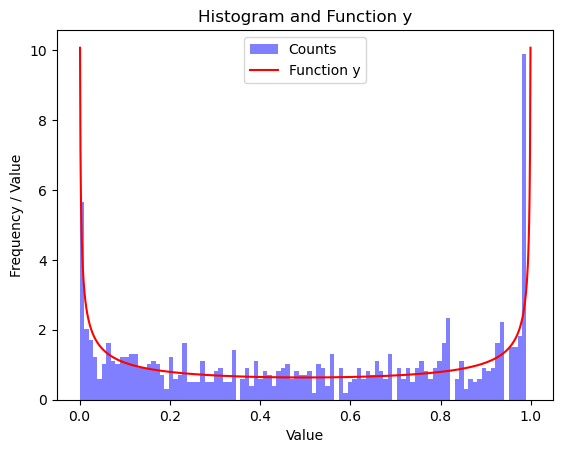

In [5]:
B = []
for i in range(1000):
    B.append(brownian_motion(1, 0.01))
    
counts = []
for sublist in B:
    count_above_zero = (sum(1 for element in sublist if element > 0))/101
    counts.append(count_above_zero)
    

x = np.linspace(0, 1, 1000)
y = 1 / (np.sqrt(x * (1-x)) * np.pi)

plt.hist(counts, bins=100, alpha=0.5, density=True, color='blue', label='Counts')
plt.plot(x, y, color='red', label='Function y')

plt.xlabel('Value')
plt.ylabel('Frequency / Value')
plt.title('Histogram and Function y')
plt.legend()
plt.show()

3.4 **Arcsine law for Ornstein-Uhlenbeck?** Consider a Ornstein-Uhlenbeck process on [0,1], ($𝑋_𝑡$, 𝑡 ∈ [0,1]) as in Numerical Project 2.3. Repeat the experiment of Project 3.3 with Ornstein-Uhlenbeck paths. What do you notice?

C:\Users\sindh\AppData\Local\Temp\ipykernel_5112\356649100.py:34: RuntimeWarning: divide by zero encountered in divide
  y = 1 / (np.sqrt(x * (1-x)) * np.pi)


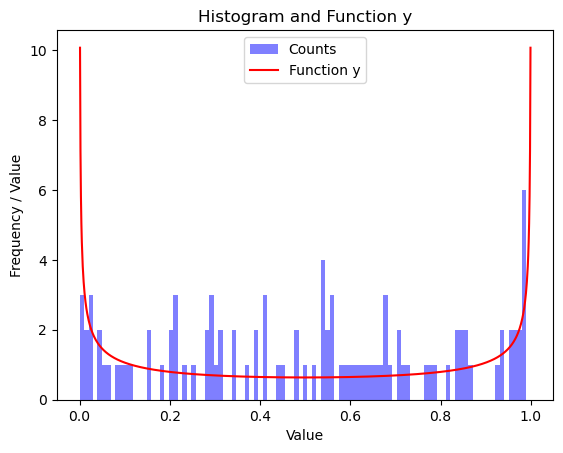

In [6]:
def return_standard_gaussian(N):
  return np.random.standard_normal((N, 100))

def covariance_function(s, t):
    return (np.exp(-2 * np.abs(t - s))/2) * (1 - np.exp(-2 * np.minimum(s, t)))

i_values = np.linspace(0.01, 1.0, num=100)
j_values = np.linspace(0.01, 1.0, num=100)

C = np.zeros((100,100))
for i_idx, i in enumerate(i_values):
    for j_idx, j in enumerate(j_values):
        C[i_idx, j_idx] = covariance_function(i, j)
    


A = np.linalg.cholesky(C)


Z = return_standard_gaussian(100)

X1 = np.dot(A,Z)
X0 = np.zeros((100, 1))

X = np.hstack([X0, X1])
X = np.transpose(X)

counts = []
for sublist in X:
    count_above_zero = (sum(1 for element in sublist if element > 0))/101
    counts.append(count_above_zero)
    
x = np.linspace(0, 1, 1000)
y = 1 / (np.sqrt(x * (1-x)) * np.pi)

plt.hist(counts, bins=100, alpha=0.5, density=True, color='blue', label='Counts')
plt.plot(x, y, color='red', label='Function y')

plt.xlabel('Value')
plt.ylabel('Frequency / Value')
plt.title('Histogram and Function y')
plt.legend()
plt.show()

3.5 **Brownian variations** In this numerical project, we observe Corollaries 3.16 and 3.17 in action. Consider 𝑛 = 1, . . . , 20. For each 𝑛, consider the dyadic partition of [0, 1] given by $𝑡_𝑗 = 𝑗/2^𝑛$. Sample a single Brownian path with time step $2^{−20}$ on
[0, 1]. For this single path:

(a) Compute for each 𝑛 the variation
$\sum_{j=0}^{2^n-1} | B_{t_{j+1}} - B_{t_{j}} |$

In [7]:
time_step = 2**(-20)

B = brownian_motion(1, time_step)


In [11]:
def variation(B, n):
    partition_size = len(B) // n  
    total_variation = 0  

    for i in range(n):
        start_idx = i * partition_size  
        end_idx = (i + 1) * partition_size  

        
        if i == n - 1:
            end_idx = len(B)

        
        variation_in_partition = abs(B[end_idx - 1] - B[start_idx])

        total_variation += variation_in_partition  

    return total_variation

results_variation = []
for n in range(1, 21):
    total_variation = variation(B, n)
    results_variation.append([n, total_variation])

# Display results in a table
print(tabulate(results_variation, headers=["n", "Total Variation"]))

  n    Total Variation
---  -----------------
  1           0.516302
  2           0.549606
  3           1.04075
  4           1.07338
  5           1.32227
  6           2.18546
  7           1.7875
  8           2.25238
  9           2.89228
 10           3.37951
 11           2.45587
 12           3.13307
 13           3.65246
 14           3.34358
 15           3.09699
 16           3.31085
 17           3.14429
 18           3.96002
 19           3.29425
 20           3.61236


(b) Compute for each 𝑛 the variation
$\sum_{j=0}^{2^n-1}  (B_{t_{j+1}} - B_{t_{j}})^2$

In [13]:
def quadratic_variation(B, n):
    partition_size = len(B) // n  
    total_variation = 0  

    for i in range(n):
        start_idx = i * partition_size  
        end_idx = (i + 1) * partition_size  

        
        if i == n - 1:
            end_idx = len(B)

        
        variation_in_partition = (B[end_idx - 1] - B[start_idx])**2

        total_variation += variation_in_partition  

    return total_variation

results_quadratic_variation = []
for n in range(1, 21):
    total_variation = quadratic_variation(B, n)
    results_quadratic_variation.append([n, total_variation])

# Display results in a table
print(tabulate(results_quadratic_variation, headers=["n", "Total Variation"]))

  n    Total Variation
---  -----------------
  1           0.266568
  2           0.285318
  3           0.379917
  4           0.317266
  5           0.402481
  6           1.0983
  7           0.739296
  8           1.05105
  9           1.36725
 10           1.45769
 11           0.687704
 12           1.12621
 13           1.45721
 14           1.25139
 15           0.855002
 16           1.15452
 17           0.845666
 18           1.39267
 19           0.805546
 20           1.10899


(c) Draw the graph of the variation and of the quadratic variation as a function of 𝑛, 𝑛 = 1, . . . , 20. What do you observe?

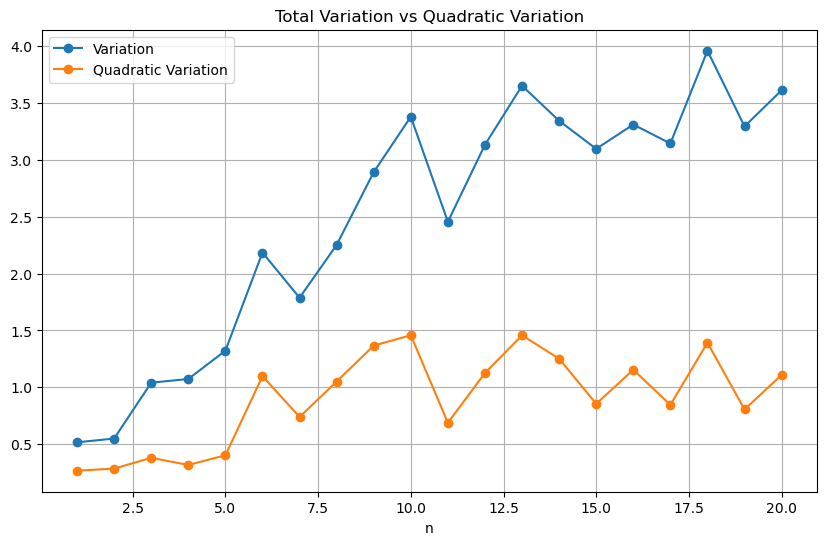

In [14]:
n_values = [row[0] for row in results_variation]
variation_values = [row[1] for row in results_variation]
quadratic_variation_values = [row[1] for row in results_quadratic_variation]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_values, variation_values, label='Variation', marker='o')
plt.plot(n_values, quadratic_variation_values, label='Quadratic Variation', marker='o')
plt.xlabel('n')
plt.ylabel('')
plt.title('Total Variation vs Quadratic Variation')
plt.legend()
plt.grid(True)
plt.show()

3.6 **Simulating Brownian motion using Lévy’s construction** Use equation (3.9) to generate 10 paths of standard Brownian motion for 𝑁 = 5, 𝑁 = 20, 𝑁 = 100.

In [19]:
def Lambda(t):
    if 0<=t<=0.5:
        return t
    elif 0.5<=t<=1:
        return 1-t
    else:
        return 0
    
def decomp_n_j_k(n):
    j=0
    k=0
    while 2**j <= n:
        j=j+1
    
    j=j-1
    
    k = n-2**j
    
    return j,k

def brownian_levy(N):
    
    Z = np.random.standard_normal(N+1)
    
    B = [0]
    
    for i in range(100):
        t = (i+1)/100
        Bt = t*Z[0]
        for n in range(1, N+1):
            j, k = decomp_n_j_k(n)
            Bt = Bt + (2**(j/2))*Lambda(-k + t*(2**j))*Z[n]
        B.append(Bt)
    return B

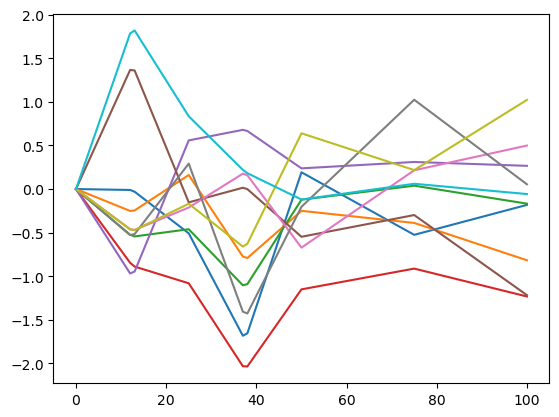

In [20]:
# N = 5

for i in range(10):
    B_5 = brownian_levy(5)
    plt.plot(B_5)

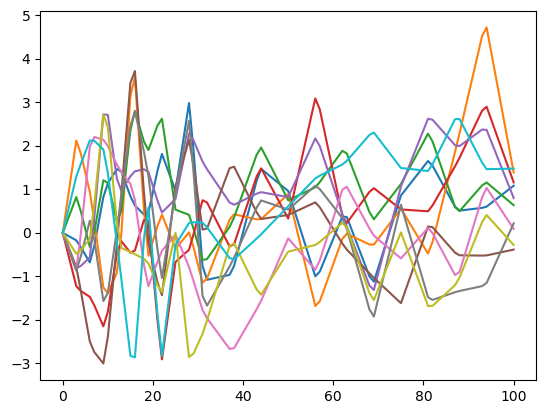

In [21]:
# N = 20

for i in range(10):
    B_20 = brownian_levy(20)
    plt.plot(B_20)

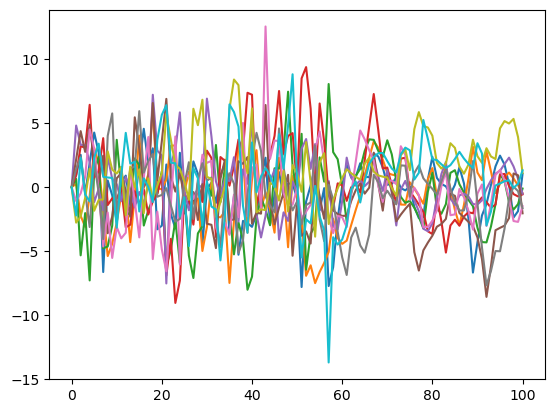

In [22]:
# N = 100

for i in range(10):
    B_100 = brownian_levy(100)
    plt.plot(B_100)